In [360]:
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

In [96]:
checkpoints = pd.read_csv('./checkpoints.csv')
items = pd.read_csv('./items.csv')
media_views = pd.read_csv('./media_views.csv')
page_views = pd.read_csv('./page_views.csv', low_memory=False)
responses = pd.read_csv('./responses.csv', low_memory=False)

In [324]:
eng_eoc_per_chapter = page_views[['student_id','chapter', 'engaged']]

In [325]:
def toNumber(text):
    match = re.search(r'\d+', text)
    if match:
        start = match.start()
        # Find the first space after the number or the end of the string
        end = text.find(' ', start)
        # If no space found, take the rest of the string
        number = text[start:end] if end != -1 else text[start:]
        return int(number)
    else:
        return -1 # No number found

numberize = np.vectorize(toNumber)

In [326]:
eng_eoc_per_chapter['chapter'] = numberize(eng_eoc_per_chapter['chapter'])

/var/folders/cw/pwh1lm693vj2kn_b0gzqpl3r0000gn/T/ipykernel_3027/3080278044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_eoc_per_chapter['chapter'] = numberize(eng_eoc_per_chapter['chapter'])


In [327]:
eng_eoc_per_chapter = eng_eoc_per_chapter[eng_eoc_per_chapter['chapter'] != -1]

In [328]:
eng_eoc_per_chapter = eng_eoc_per_chapter.groupby(['student_id', 'chapter']).sum().reset_index()

In [329]:
eng_eoc_per_chapter = eng_eoc_per_chapter.rename(columns = {'chapter': 'chapter_number'})

In [330]:
eng_eoc_per_chapter = pd.merge(eng_eoc_per_chapter, checkpoints[['EOC', 'student_id', 'chapter_number']], on=['student_id', 'chapter_number'], how='inner')
eng_eoc_per_chapter

,student_id,chapter_number,engaged,EOC
0,001824fb-a2fd-431d-aef6-7a1250d97a62,1,8261867.0,0.921053
1,001824fb-a2fd-431d-aef6-7a1250d97a62,2,30902762.0,0.839080
2,001824fb-a2fd-431d-aef6-7a1250d97a62,2,30902762.0,0.839080
3,001824fb-a2fd-431d-aef6-7a1250d97a62,2,30902762.0,0.839080
4,001824fb-a2fd-431d-aef6-7a1250d97a62,2,30902762.0,0.839080
...,...,...,...,...
60703,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,13,7140619.0,0.677419
60704,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,13,7140619.0,0.677419
60705,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,14,7802712.0,0.517857
60706,ff6ec9fe-de1d-4b45-8136-59465d9c85ab,15,1384577.0,0.272727


In [331]:
eng_eoc_per_chapter = eng_eoc_per_chapter.drop(columns=['student_id'])
eng_eoc_per_chapter

,chapter_number,engaged,EOC
0,1,8261867.0,0.921053
1,2,30902762.0,0.839080
2,2,30902762.0,0.839080
3,2,30902762.0,0.839080
4,2,30902762.0,0.839080
...,...,...,...
60703,13,7140619.0,0.677419
60704,13,7140619.0,0.677419
60705,14,7802712.0,0.517857
60706,15,1384577.0,0.272727


In [332]:
eng_eoc_per_chapter = eng_eoc_per_chapter.groupby('chapter_number').mean().reset_index()
eng_eoc_per_chapter['engaged'] = eng_eoc_per_chapter['engaged'] / (1000 * 60 * 60)
eng_eoc_per_chapter

,chapter_number,engaged,EOC
0,1,1.446756,0.804904
1,2,3.598263,0.704146
2,3,3.713119,0.659845
3,4,3.826423,0.636562
4,5,2.299134,0.659261
5,6,3.110684,0.623048
6,7,1.805588,0.612311
7,8,1.658452,0.620329
8,9,2.385074,0.602346
9,10,1.842490,0.577766


In [333]:
eng_eoc_per_chapter.corr()
correlation, p_value = pearsonr(eng_eoc_per_chapter['engaged'], eng_eoc_per_chapter['EOC'])
correlation

0.45967514177501867

In [334]:
eng_eoc_per_chapter

,chapter_number,engaged,EOC
0,1,1.446756,0.804904
1,2,3.598263,0.704146
2,3,3.713119,0.659845
3,4,3.826423,0.636562
4,5,2.299134,0.659261
5,6,3.110684,0.623048
6,7,1.805588,0.612311
7,8,1.658452,0.620329
8,9,2.385074,0.602346
9,10,1.842490,0.577766


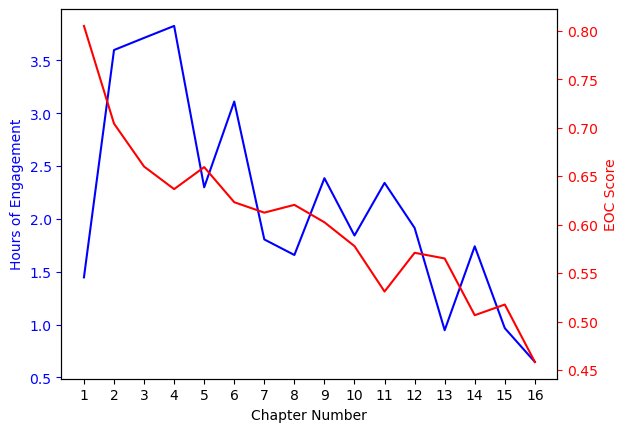

In [335]:
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['engaged'])
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'])

fig, ax1 = plt.subplots()

# Plotting the first dataset with the primary y-axis
ax1.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['engaged'], 'b-')  # Blue line
ax1.set_xlabel('Chapter Number')
ax1.set_ylabel('Hours of Engagement', color='b')
ax1.tick_params('y', colors='b')

ax1.set_xticks(np.arange(1, 17))

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'], 'r')  # Orange line
ax2.set_ylabel('EOC Score', color='r')
ax2.tick_params('y', colors='r')

# Optionally, set the limit for the secondary y-axis if you need to scale it differently
# ax2.set_ylim([min_value, max_value])  # Replace min_value and max_value with the desired range

# Show the plot with two different y-axes
plt.show()

In [336]:
engagement_vs_eoc = eng_eoc_per_chapter
engagement_vs_eoc['diff'] =  eng_eoc_per_chapter['EOC'] * 4.55 - eng_eoc_per_chapter['engaged']
engagement_vs_eoc

,chapter_number,engaged,EOC,diff
0,1,1.446756,0.804904,2.215556
1,2,3.598263,0.704146,-0.394399
2,3,3.713119,0.659845,-0.710825
3,4,3.826423,0.636562,-0.930065
4,5,2.299134,0.659261,0.700503
5,6,3.110684,0.623048,-0.275817
6,7,1.805588,0.612311,0.980429
7,8,1.658452,0.620329,1.164047
8,9,2.385074,0.602346,0.355601
9,10,1.842490,0.577766,0.786344


Text(0.5, 0, 'Chapter Number')

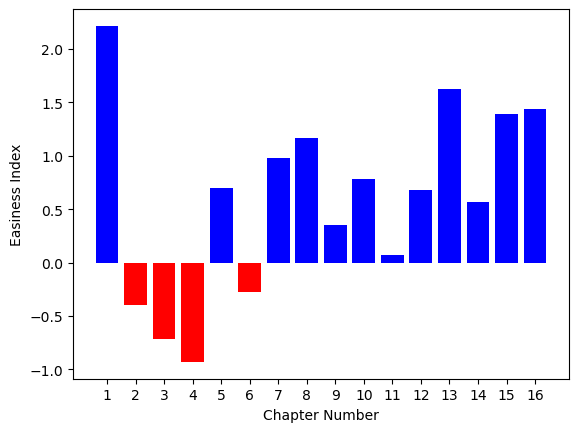

In [337]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
colors = ['red' if value < 0 else 'b' for value in engagement_vs_eoc['diff']]
plt.bar(engagement_vs_eoc['chapter_number'], engagement_vs_eoc['diff'], color=colors)
plt.xticks(np.arange(1, 17))
plt.ylabel('Easiness Index')  # This sets the label for the y-axis
plt.xlabel('Chapter Number') 

In [338]:
numPages = [7, 11, 11, 16, 12, 14, 11, 8, 13, 9, 11, 8, 9, 11, 8, 8]
eng_eoc_per_chapter['engaged'] = eng_eoc_per_chapter['engaged'] / numPages
eng_eoc_per_chapter['engaged'] *= eng_eoc_per_chapter['engaged'] * 60
eng_eoc_per_chapter = eng_eoc_per_chapter.rename(columns={'engaged': 'avg_engagement_per_page'})

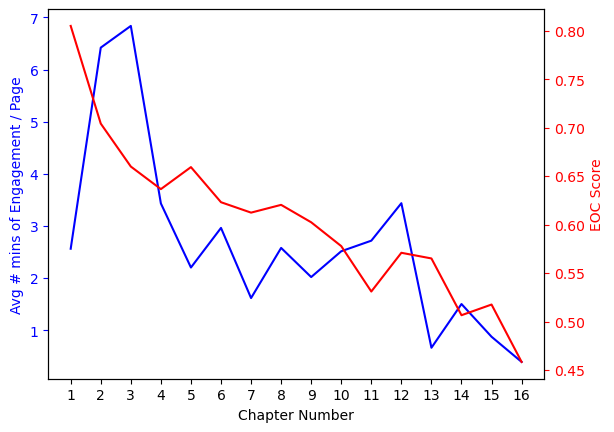

In [339]:
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['engaged'])
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'])

fig, ax1 = plt.subplots()

# Plotting the first dataset with the primary y-axis
ax1.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['avg_engagement_per_page'], 'b-')  # Blue line
ax1.set_xlabel('Chapter Number')
ax1.set_ylabel('Avg # mins of Engagement / Page', color='b')
ax1.tick_params('y', colors='b')

ax1.set_xticks(np.arange(1, 17))

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'], 'r')  # Orange line
ax2.set_ylabel('EOC Score', color='r')
ax2.tick_params('y', colors='r')

# Optionally, set the limit for the secondary y-axis if you need to scale it differently
# ax2.set_ylim([min_value, max_value])  # Replace min_value and max_value with the desired range

# Show the plot with two different y-axes
plt.show()

In [377]:
eng_eoc_per_chapter.corr()
correlation, p_value = pearsonr(eng_eoc_per_chapter['avg_engagement_per_page'], eng_eoc_per_chapter['EOC'])
correlation

0.5488075347981234

In [341]:
engagement_vs_eoc = eng_eoc_per_chapter
engagement_vs_eoc['diff'] =  eng_eoc_per_chapter['EOC'] * 7.9 - eng_eoc_per_chapter['avg_engagement_per_page']
engagement_vs_eoc

,chapter_number,avg_engagement_per_page,EOC,diff
0,1,2.562983,0.804904,3.795756
1,2,6.420245,0.704146,-0.857492
2,3,6.836653,0.659845,-1.623879
3,4,3.431604,0.636562,1.597237
4,5,2.202507,0.659261,3.005655
5,6,2.962149,0.623048,1.959927
6,7,1.616601,0.612311,3.220658
7,8,2.578558,0.620329,2.322044
8,9,2.019613,0.602346,2.738922
9,10,2.514644,0.577766,2.049704


Text(0.5, 0, 'Chapter Number')

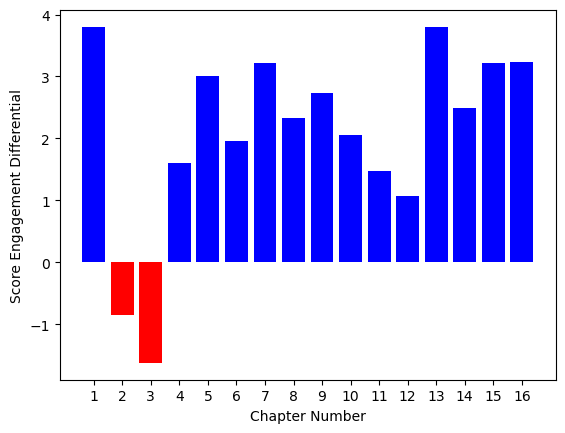

In [342]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
colors = ['red' if value < 0 else 'b' for value in engagement_vs_eoc['diff']]
plt.bar(engagement_vs_eoc['chapter_number'], engagement_vs_eoc['diff'], color=colors)
plt.xticks(np.arange(1, 17))
plt.ylabel('Score Engagement Differential')  # This sets the label for the y-axis
plt.xlabel('Chapter Number') 

In [343]:
revisits = [2.66, 5.15, 4.38, 4.45, 4.58, 4.25, 2.27, 1.89, 3.33]
correlation, p_value = pearsonr(eng_eoc_per_chapter['avg_engagement_per_page'][0:9], revisits)
p_value
correlation

0.6156768085306225

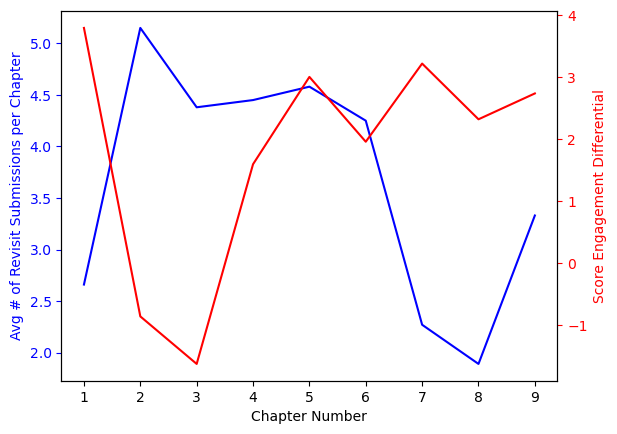

In [378]:
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['engaged'])
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'])

fig, ax1 = plt.subplots()

# Plotting the first dataset with the primary y-axis
ax1.plot(eng_eoc_per_chapter['chapter_number'][0:9], revisits, 'b-')  # Blue line
ax1.set_xlabel('Chapter Number')
ax1.set_ylabel('Avg # of Revisit Submissions per Chapter', color='b')
ax1.tick_params('y', colors='b')

ax1.set_xticks(np.arange(1, 10))

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(eng_eoc_per_chapter['chapter_number'][0:9], eng_eoc_per_chapter['diff'][0:9], 'r')  # Orange line
ax2.set_ylabel('Score Engagement Differential', color='r')
ax2.tick_params('y', colors='r')

# Optionally, set the limit for the secondary y-axis if you need to scale it differently
# ax2.set_ylim([min_value, max_value])  # Replace min_value and max_value with the desired range

# Show the plot with two different y-axes
plt.show()

In [345]:
eng_eoc_per_chapter['diff'].mean()

2.093836937574542

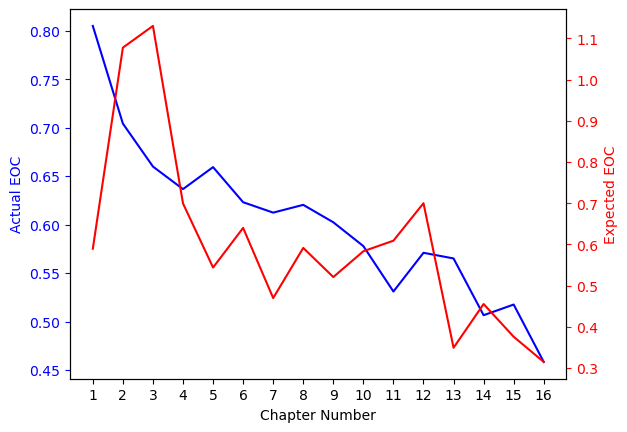

In [363]:
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['engaged'])
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'])
expected = (eng_eoc_per_chapter['avg_engagement_per_page'] + 2.093836937574542 ) / 7.9
fig, ax1 = plt.subplots()

# Plotting the first dataset with the primary y-axis
ax1.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'], 'b-')  # Blue line
ax1.set_xlabel('Chapter Number')
ax1.set_ylabel('Actual EOC', color='b')
ax1.tick_params('y', colors='b')

ax1.set_xticks(np.arange(1, 17))

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(eng_eoc_per_chapter['chapter_number'], expected, 'r')  # Orange line
ax2.set_ylabel('Expected EOC', color='r')
ax2.tick_params('y', colors='r')

# Calculating the common y-axis limits
all_values = np.concatenate([eng_eoc_per_chapter['avg_engagement_per_page'], expected])
min_value, max_value = all_values.min(), all_values.max()
# Show the plot with two aligned y-axes
plt.show()

Text(0.5, 0, 'Chapter Number')

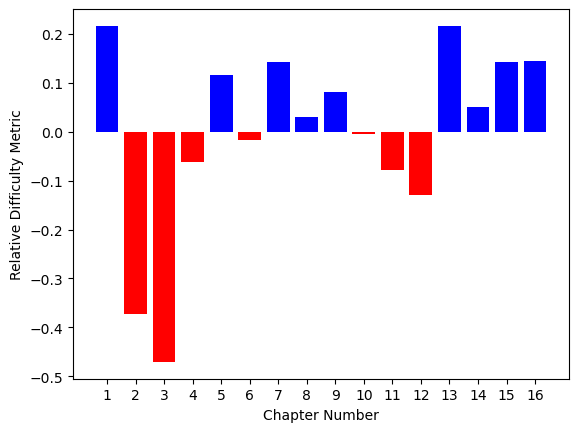

In [369]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
colors = ['red' if value < 0 else 'b' for value in engagement_vs_eoc['EOC'] - expected]
plt.bar(engagement_vs_eoc['chapter_number'], engagement_vs_eoc['EOC'] - expected, color=colors)
plt.xticks(np.arange(1, 17))
plt.ylabel('Relative Difficulty Metric')  # This sets the label for the y-axis
plt.xlabel('Chapter Number') 

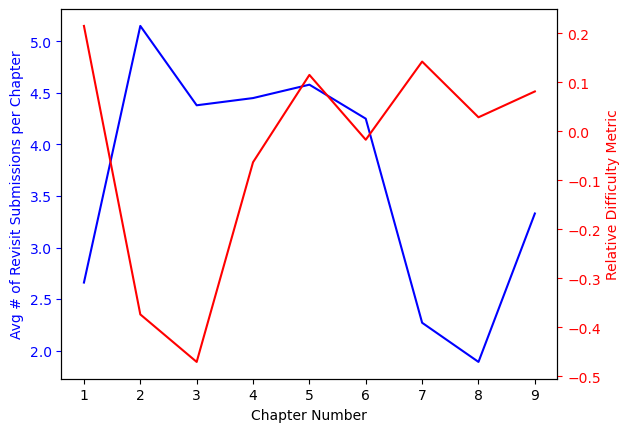

In [383]:
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['engaged'])
#plt.plot(eng_eoc_per_chapter['chapter_number'], eng_eoc_per_chapter['EOC'])

fig, ax1 = plt.subplots()

# Plotting the first dataset with the primary y-axis
ax1.plot(eng_eoc_per_chapter['chapter_number'][0:9], revisits, 'b-')  # Blue line
ax1.set_xlabel('Chapter Number')
ax1.set_ylabel('Avg # of Revisit Submissions per Chapter', color='b')
ax1.tick_params('y', colors='b')

ax1.set_xticks(np.arange(1, 10))

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(eng_eoc_per_chapter['chapter_number'][0:9], (engagement_vs_eoc['EOC'] - expected)[0:9], 'r')  # Orange line
ax2.set_ylabel('Relative Difficulty Metric', color='r')
ax2.tick_params('y', colors='r')

# Optionally, set the limit for the secondary y-axis if you need to scale it differently
# ax2.set_ylim([min_value, max_value])  # Replace min_value and max_value with the desired range

# Show the plot with two different y-axes
plt.show()

In [382]:
revisits = [2.66, 5.15, 4.38, 4.45, 4.58, 4.25, 2.27, 1.89, 3.33]
correlation, p_value = pearsonr((engagement_vs_eoc['EOC'] - expected)[0:9], revisits)
p_value
correlation

-0.6166592012152867